# Exploration of the Coupe et al. simulation results

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import waccm

Some notes on the Coupe et al. data set:
* It has a monthly resolution
* It starts in January of the year of the nuclear war (which takes place in May)
* The available variables are (the dimensions of each variables, 2D or 3D, are also specified):
  * `AEROD_v`, the total aerosol optical depth in the visible band (latitude, longitude)
  * `CRSOOTMR`, Soot mass mixing ration in kg/kg (latitude, longitude)
  * `CRSOOTRE`, Soot effective radius in um (latitude, longitude, pressure level)
  * `FSDS`, Downwelling solar flux at surface in W/m² (latitude, longitude)
  * `FSNS`, Net solar flux at surface in W/m² (latitude, longitude)
  * `PRECC`, Convective precipitation rate (liq + ice) in m/s (latitude, longitude)
  * `PRECL`, Large-scale (stable) precipitation rate (liq + ice) in m/s (latitude, longitude)
  * `PS`, the surface pressure in Pa (latitude, longitude)
  * `Q`, the specific humidity in kg/kg (latitude, longitude, pressure level)
  * `RELHUM`, the relative humidity in % (latitude, longitude, pressure level)
  * `T`, the temperature in K (latitude, longitude, pressure level)
  * `Z3`, the geopotential height above sea level in meters (latitude, longitude, pressure level)
* The functions available in `analysis.py` define Year 1 as being the year of the nuclear war 

The first simple type of plot we can make is a map of a given quantity using `analysis.plot_map()`

Level: 266.481155 hPa


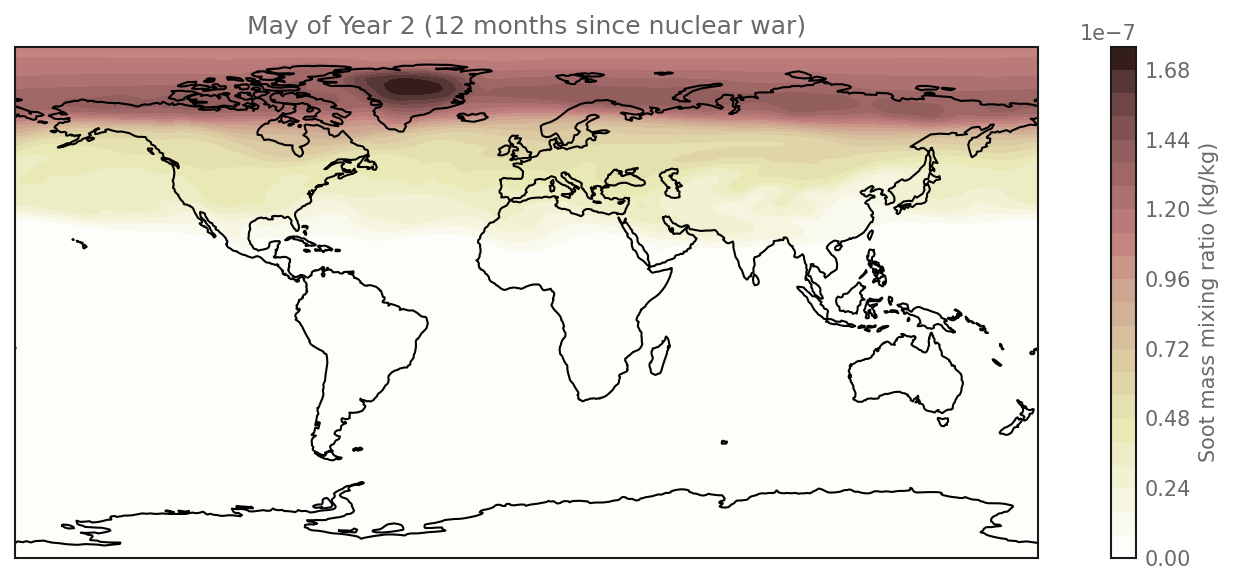

In [2]:
waccm.plot_map("CRSOOTMR", year=2, month=5, lev=250)

A second type of map plot consists in comparing to a reference year and showing the difference. By default the reference year is taken to be Year 16, which corresponds to the end year of the simulation when things more or less return to normal. This is done using `analysis.plot_map_diff()`.

TypeError: label() missing 1 required positional argument: 'month'

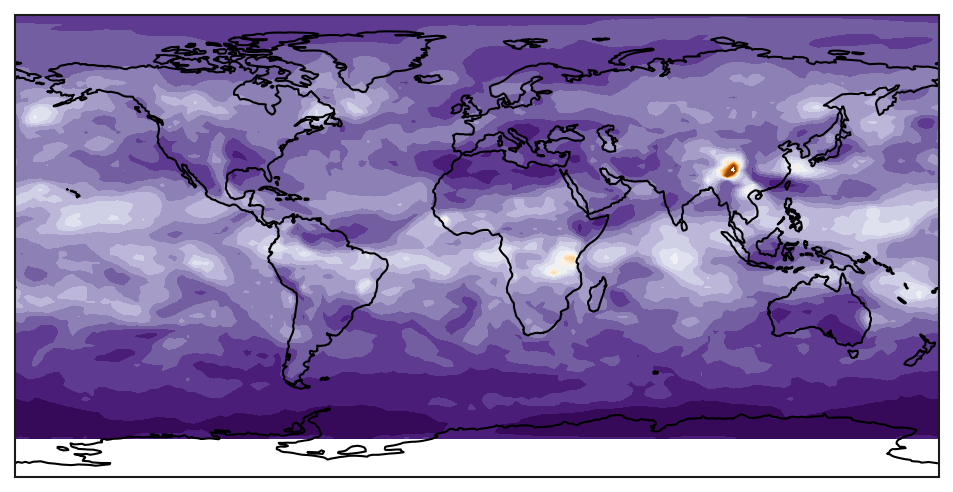

In [3]:
waccm.plot_map_diff(var="FSDS", year=4, month=5, relative=True)

Instead of maps, we can also average quantities over the whole world and look at a time series. This is what I do below for the downwelling solar flux at the surface. This reproduced results presented in Coupe et al., namely a >60% reduction for the first 2.5 years, and 10 years needed for recovery. Note that the exact shape of the curve is a bit different, because Coupe et al. compare to a control run, while I compare to the last year of the simulation (I don't have access to that control run). I think we can ignore this difference. 

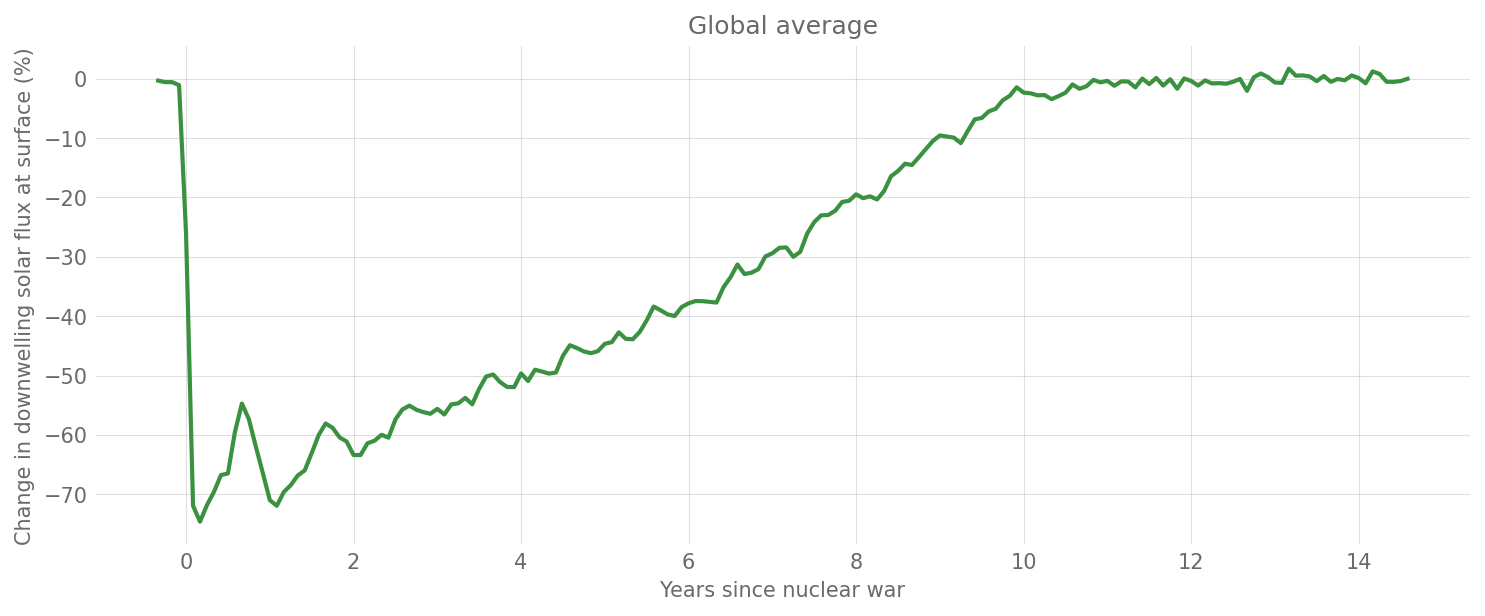

In [ ]:
waccm.plot_time_series_global_average("FSDS", diff=True, relative=True)

Instead of looking at a global average, we can also look at a specific locations. For instance, we look below at the impact of the nuclear winter on solar radiation in New South Whales, Xinjiang, and Arizona.

TypeError: label() missing 1 required positional argument: 'month'

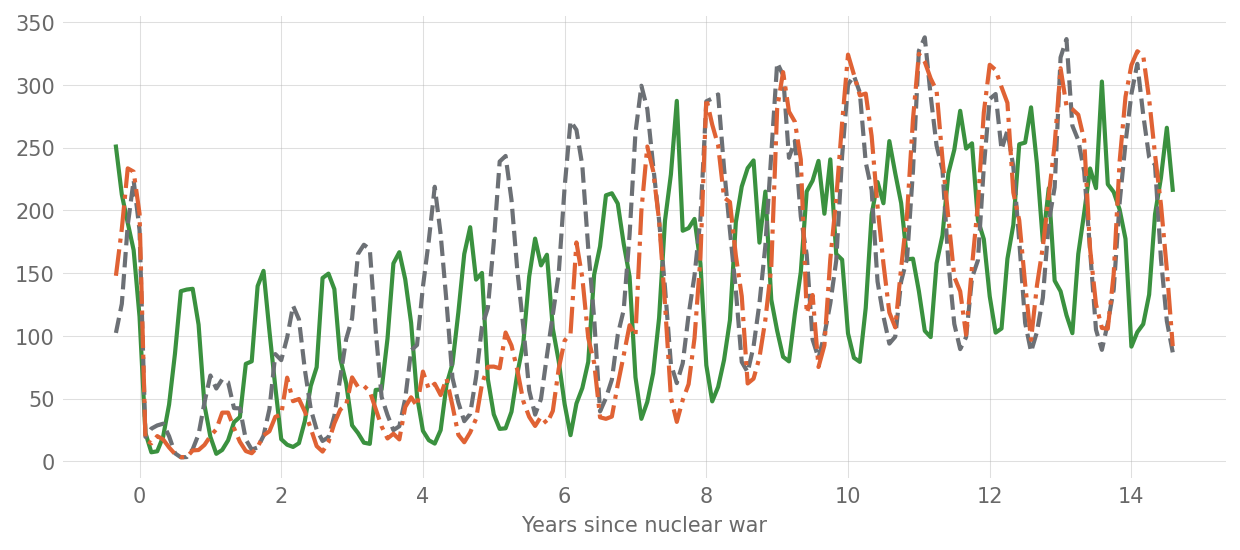

In [4]:
waccm.plot_time_series_location("FSDS", lat=[-32, 42, 34], lon=[146, 85, -111])

## Extract data for the greenhouse project

In [11]:
# Extract FSDS data for years 1-10 and all months
data = []
for year in range(1, 11):
    for month in range(1, 12):
        ds = waccm.get(var="FSDS", year=year, month=month)
        for lat in ds.lat.values:
            for lon in ds.lon.values:
                value = ds.sel(lat=lat, lon=lon).values.item()
                data.append([lat, lon, year, month, value])

# Create DataFrame and save to CSV
import pandas as pd
df = pd.DataFrame(data, columns=['lat', 'lon', 'year', 'month', 'FSDS'])
df.to_csv('FSDS_data_years1-10.csv', index=False)

## Australia maps

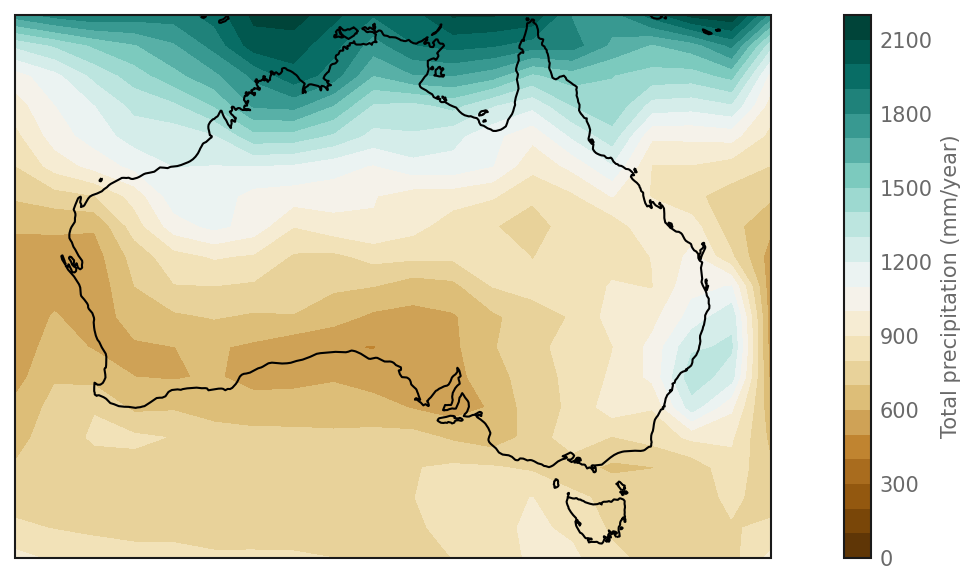

In [58]:
waccm.plot_map("total_precip", year=[14,15], month="annual", region="australia", vmin=0, vmax=2200, save=False, nv=23)

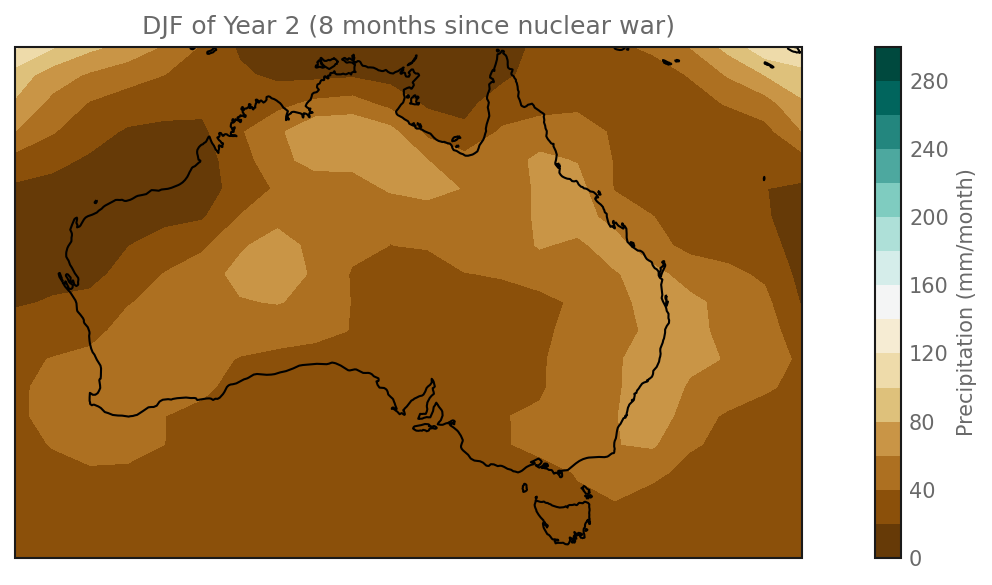

In [3]:
for year in range(2, 3):
    waccm.plot_map("total_precip", year=year, month="DJF", region="australia", vmin=0, vmax=300, save=True)

Level: 992.5561 hPa


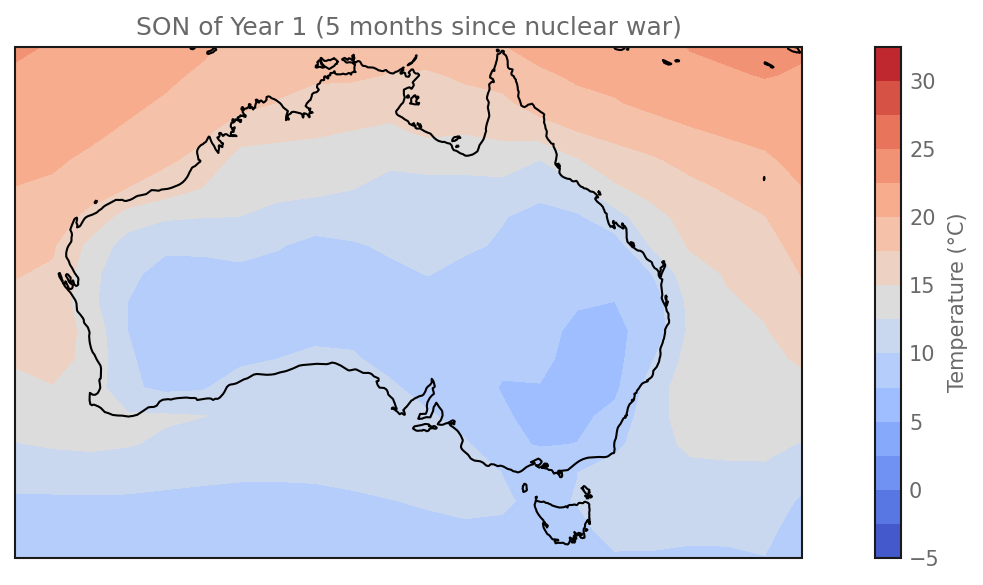

In [4]:
for year in range(1, 2):
    waccm.plot_map("T", year=year, month="SON", region="australia", vmin=-5, vmax=32.5, lev=1000, save=True)

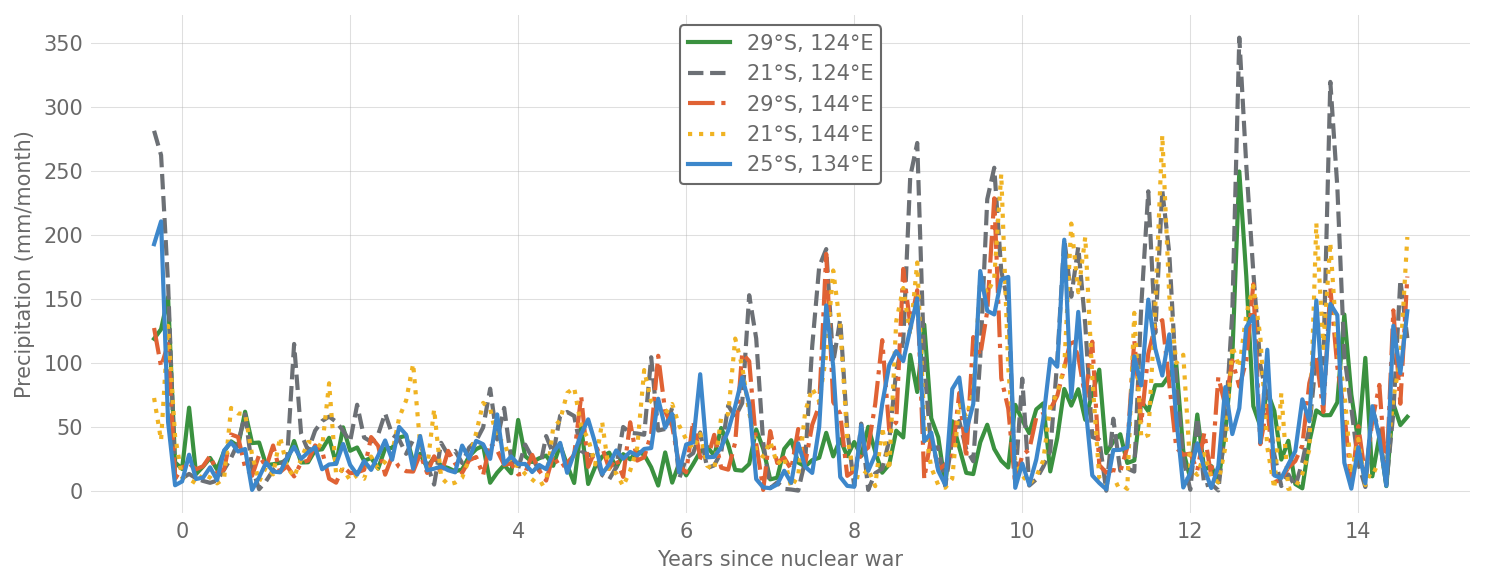

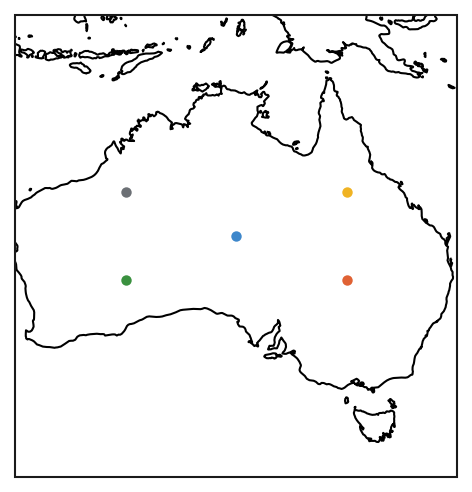

In [12]:
waccm.plot_time_series_location("total_precip", lat=[-29,-21,-29,-21,-25], lon=[124,124,144,144,134])